In [58]:
'''Importacion de librerias necesarias'''
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from graphviz import Digraph
import pydotplus

In [39]:
'''Carga y lectura de la base de datos'''
df = pandas.read_csv('UrbanSound8K.csv',sep =',')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [41]:
'''Vizualizacion de las columnas del dataframe'''
df.keys()

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')

In [42]:
'''Deteccion de valores unicos de la ultima columna'''
df['slice_file_name'].unique()

array(['100032-3-0-0.wav', '100263-2-0-117.wav', '100263-2-0-121.wav',
       ..., '99812-1-4-0.wav', '99812-1-5-0.wav', '99812-1-6-0.wav'],
      dtype=object)

In [28]:
'''Creacion de diccionario de datos y mapeo para la columna slice_file_name'''
auxSlice = df['slice_file_name']
dfSlice = {}
count=0
for x in auxSlice:
    dfSlice[x] = count 
    count=count+1 
df['slice_file_name'] = df['slice_file_name'].map(dfSlice)

In [43]:
'''Deteccion de valores unicos de la columna class'''
df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

'''Creacion de diccionario de datos y mapeo para la columna class'''

In [44]:
auxclass = df['class']
dfclass = {}
count=0
for x in auxclass:
    dfclass[x] = count 
    count=count+1
df['class'] = df['class'].map(dfclass)
df['class']

0       8681
1       8716
2       8716
3       8716
4       8716
        ... 
8727    8731
8728    8731
8729    8731
8730    8731
8731    8731
Name: class, Length: 8732, dtype: int64

'''Creacion de las variables X y'''

In [47]:
features = ['slice_file_name', 'fsID', 'start', 'end','fold','classID','class']
X = df[features]
y=df['salience']

'''Mostrar contenido de las va

In [33]:
print(X, y, sep='\n\n')

      slice_file_name    fsID       start         end  fold  classID  class
0                   0  100032    0.000000    0.317551     5        3   8681
1                   1  100263   58.500000   62.500000     5        2   8716
2                   2  100263   60.500000   64.500000     5        2   8716
3                   3  100263   63.000000   67.000000     5        2   8716
4                   4  100263   68.500000   72.500000     5        2   8716
...               ...     ...         ...         ...   ...      ...    ...
8727             8727   99812  159.522205  163.522205     7        1   8731
8728             8728   99812  181.142431  183.284976     7        1   8731
8729             8729   99812  242.691902  246.197885     7        1   8731
8730             8730   99812  253.209850  255.741948     7        1   8731
8731             8731   99812  332.289233  334.821332     7        1   8731

[8732 rows x 7 columns]

0       1
1       1
2       1
3       1
4       1
       ..
87

In [35]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

'''Vizualizacion del arbol de decicion'''

<IPython.core.display.Javascript object>


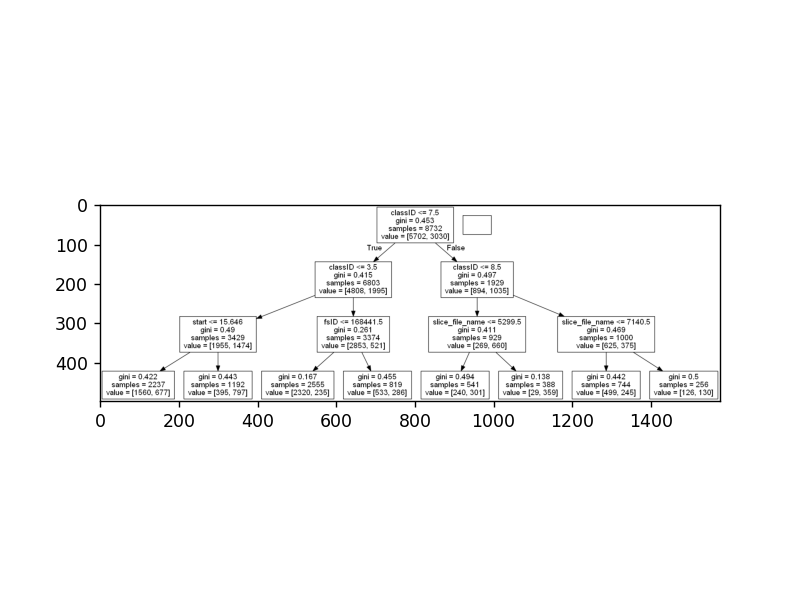

In [36]:
img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()